### Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import missingno as msno
import scikitplot as skplt

#Importing DataCleaning Libraries
from sklearn.model_selection import train_test_split

#Importing Classification Models 

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


#Importing Classification Model Evaluation Metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

#Importing Hyperparameter Tuning model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Importing Serialization libraries
import joblib

In [2]:
tt = pd.read_csv('titanic_train.csv')
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
tt.shape

(891, 12)

### About Dataset : 

- Survived: Outcome of survival (0 = No; 1 = Yes)
- Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- Name: Name of passenger
- Sex: Sex of the passenger
- Age: Age of the passenger (Some entries contain NaN)
- SibSp: Number of siblings and spouses of the passenger aboard
- Parch: Number of parents and children of the passenger aboard
- Ticket: Ticket number of the passenger
- Fare: Fare paid by the passenger
- Cabin Cabin number of the passenger (Some entries contain NaN)
- Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [4]:
#Checking features datatypes

tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

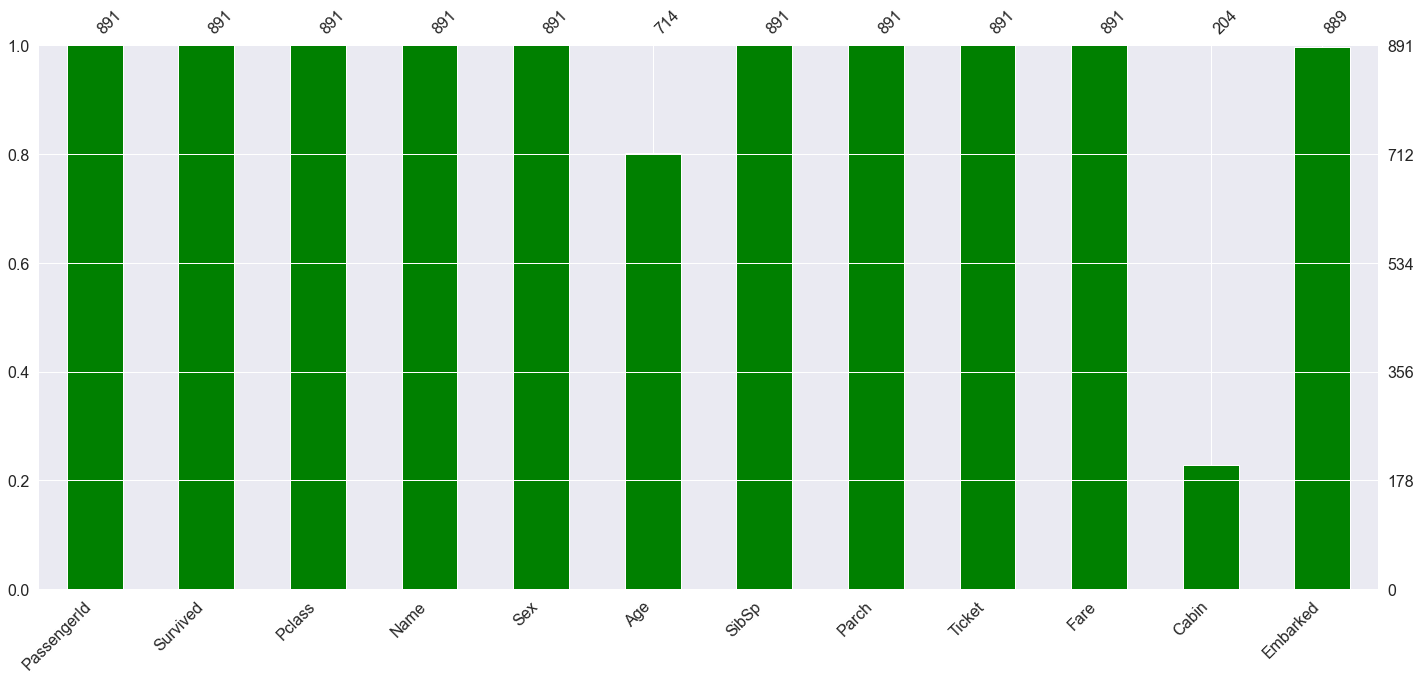

In [5]:
#Cross Checking Null Values with a bar graph
msno.bar(tt,  color = 'green')

In [6]:
#Statistical Description of Numerical Features
tt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


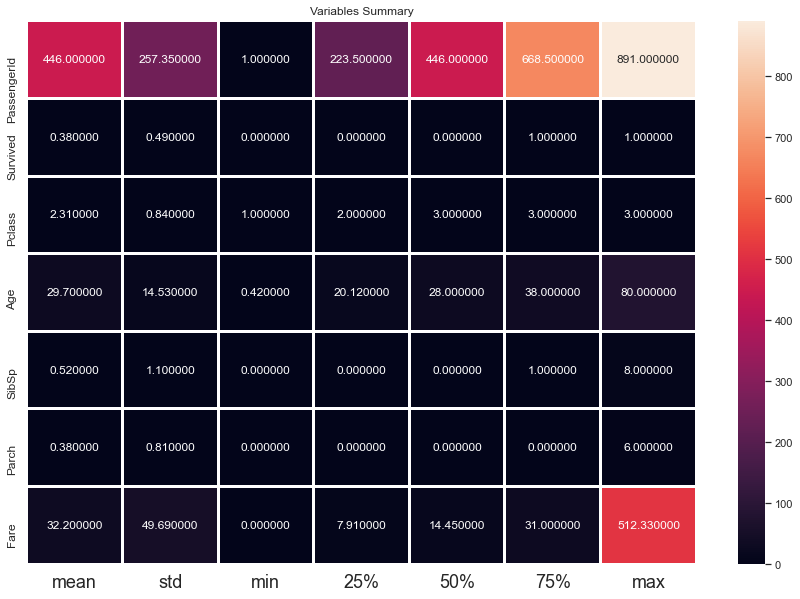

In [7]:
#visualizing statistical description of dataset
plt.figure(figsize = (15,10))
sns.heatmap(round(tt.describe()[1:].transpose(),2),linewidth = 2,annot= True, fmt = "f")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 12)
plt.title("Variables Summary")
plt.show()

- PassengerID :
    - mean = 446
    - std = 257.3538
    - max = 891
    - min = 1
    
- Survived :
    - mean = 0.3838
    - std = 0.4865
    - max = 1
    - min = 0
    
- Pclass :
    - mean =  2.3086
    - std = 0.8360
    - max = 3
    - min = 1
    
- Age :
    - mean = 29.699
    - std = 14.5264
    - max = 80
    - min = 0.42
    
- Sibsp :
    - mean = 0.5230
    - std = 1.1027
    - max = 8
    - min = 0
    
- Parch :
    - mean = 0.3815
    - std = 0.8060
    - max = 6
    - min = 0
    
- Fare :
    - mean = 32.204
    - std = 49.6934
    - max = 512
    - min = 0

In [8]:
#Correlation Table
tt.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


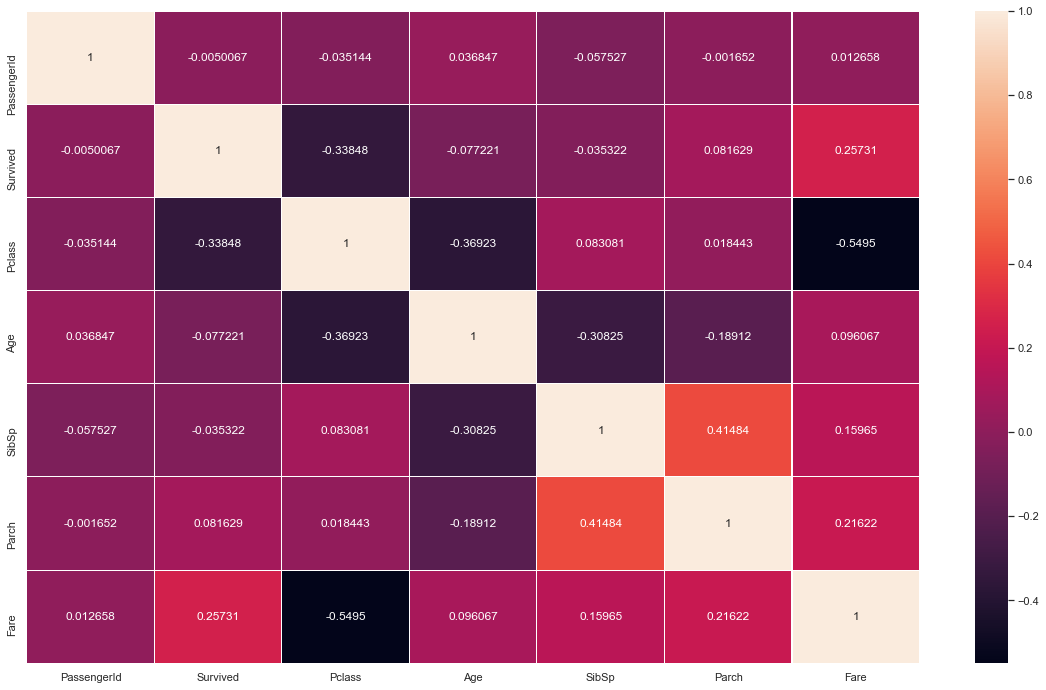

In [9]:
#plotting correlation table
plt.figure(figsize = [20,12])
sns.heatmap(tt.corr(), annot = True,linewidths=0.1,fmt = '.5g' )
plt.show()

Highest correlation is between Pclass and Fare.

In [10]:
#Checking for dupilcated Records
tt.duplicated().sum()

0

In [11]:
#Checking value counts for dead and survived
new_survived = pd.Categorical(tt["Survived"])
new_survived = new_survived.rename_categories(["Died","Survived"])

new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


<AxesSubplot:xlabel='Survived', ylabel='count'>

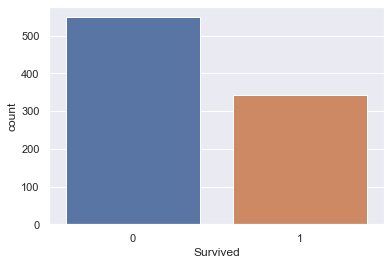

In [12]:
#Visualising density of Categories in Survived column
sns.countplot(tt['Survived'])

## Exploratory Data Analysis

<AxesSubplot:xlabel='Sex', ylabel='count'>

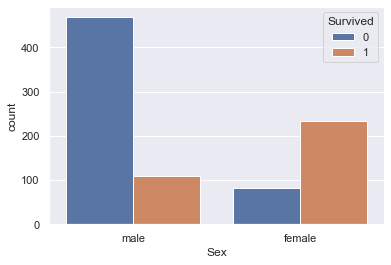

In [13]:
#Bivariate Analysis 
sns.countplot(data = tt, x  = 'Sex', hue = 'Survived')
#Analysing how Sex affected the Survival. 
#In this case clearly females survived more than the males.

<AxesSubplot:xlabel='Age', ylabel='count'>

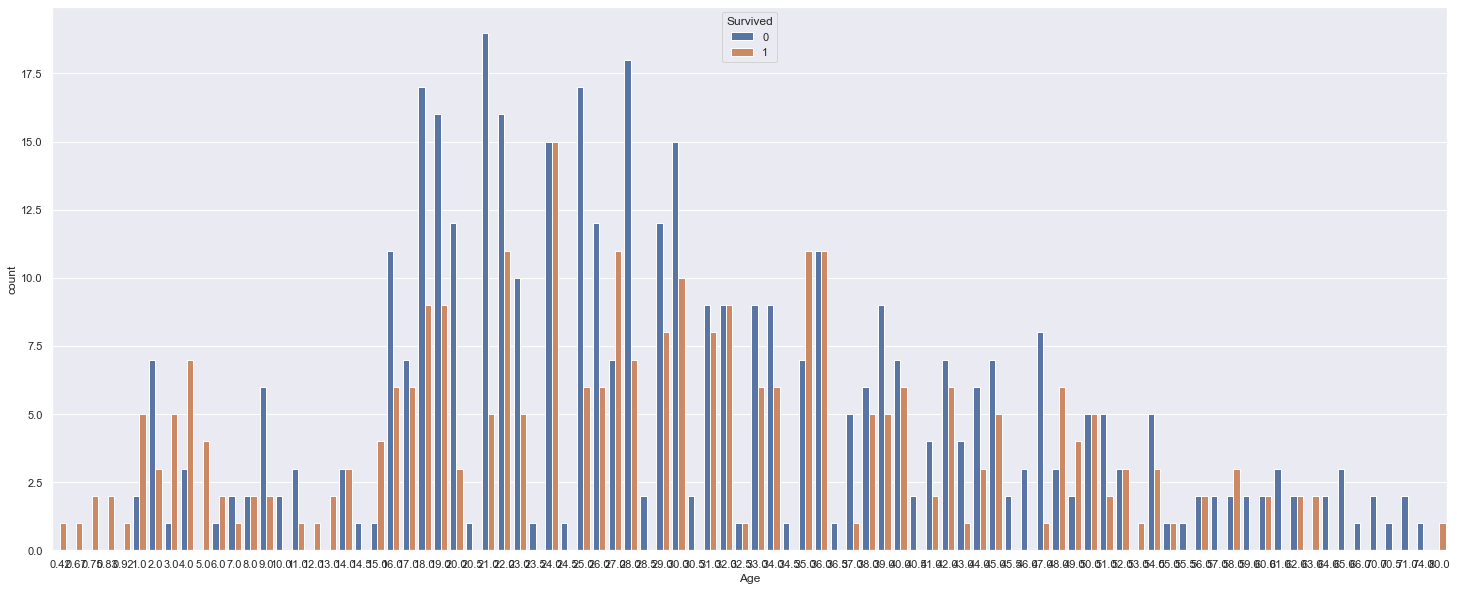

In [14]:
#Bivariate Analysis
plt.figure(figsize =(25,10) )
sns.countplot(data = tt, x  = 'Age', hue = 'Survived')
#Analysing how Age affected the Survival. 
#As the age increased the survival decreased

<AxesSubplot:xlabel='Sex', ylabel='Age'>

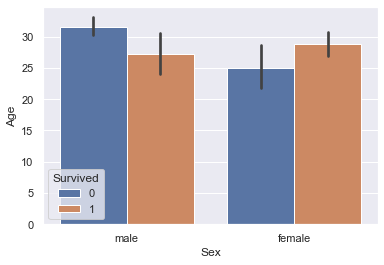

In [15]:
#Bivariate analysis
sns.barplot(data = tt, x = 'Sex', y = 'Age', hue = 'Survived')
#Analysing how both age and sex affected survival


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

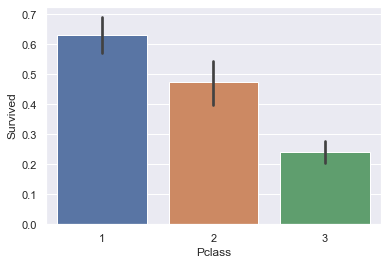

In [16]:
#Bivariate analysis

sns.barplot(data = tt, x = 'Pclass', y = 'Survived')

#people in 1st class survived more than the other two categories.

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

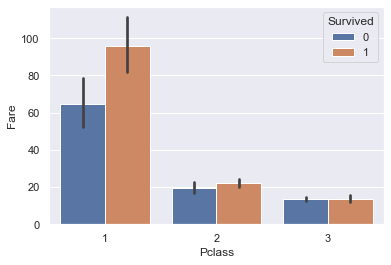

In [17]:
#Bivariate analysis

sns.barplot(data = tt, y = 'Fare', x = 'Pclass', hue = 'Survived' )
#Richer people who payed high fare for Pclass 1 survived almost double the amount of any other category. 

In [18]:
#Counting the categories and their occurences in Pclass
new_Pclass = pd.Categorical(tt["Pclass"], ordered = True)
new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"])

new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

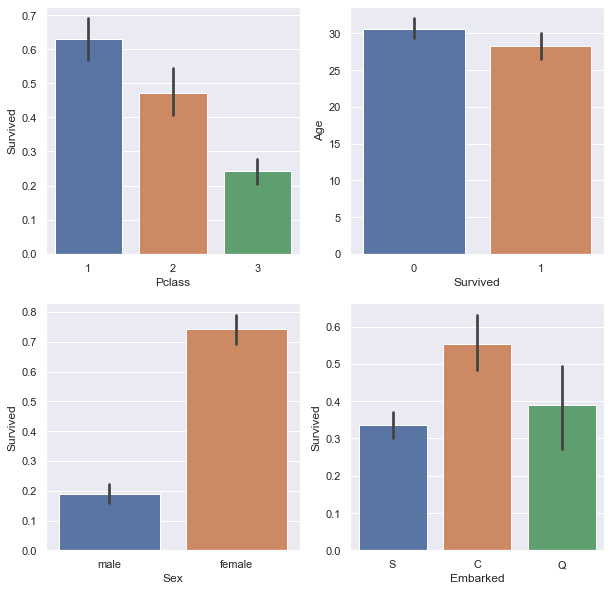

In [19]:
#Multivariate Analysis

fig, axes = plt.subplots(nrows =2,ncols = 2,figsize = (10,10))
sns.barplot(data = tt, x = 'Pclass', y = 'Survived',ax = axes[0][0])
sns.barplot(data = tt, x = 'Survived', y = 'Age',ax= axes[0][1])
sns.barplot(data = tt, x = 'Sex', y = 'Survived',ax = axes[1][0])
sns.barplot(data = tt, x = 'Embarked', y = 'Survived',ax = axes[1][1])

#Analysing how survival dependend on age,sex,pclass and Embarked

- Pclass 1 have high number of survivors
- Age below 30 have more number of survivors
- Females Survived more than twice the number of men survived
- People who Embarked from C survived more

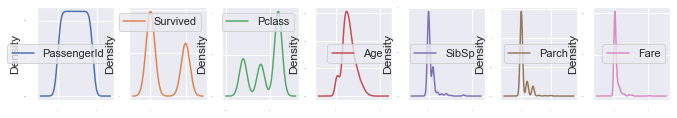

In [20]:
#data distribution (multivariate)
tt.plot(kind='density',subplots=True,layout=(6,11), sharex = False, legend = True, fontsize = 1, figsize=(18,12))
plt.show()

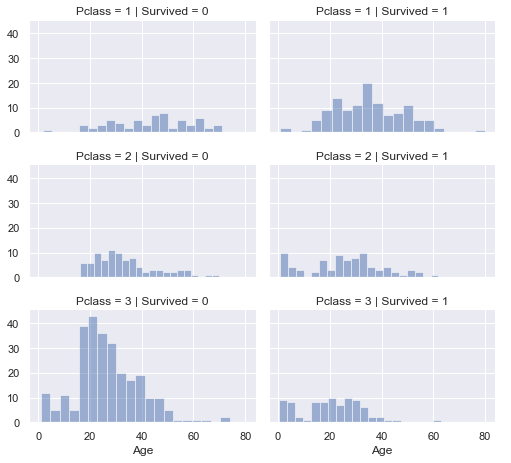

In [21]:
#Mutlivariate Analysis
#Checking distribution of data
grid = sns.FacetGrid(tt, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

- Pclass 1 had more number of survivors
- Age from 0-40 had high number of survivors

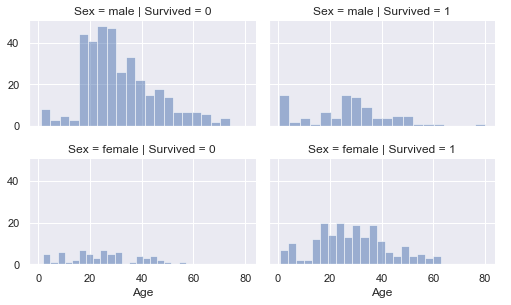

In [22]:
#multivariate Analysis
grid = sns.FacetGrid(tt, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();


-  Females survived more than males.
- Age group between (0-40) highly survived

### Data Cleaning

In [23]:
#Checking for null values
tt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
#Replacing null Values of Embarked with the most occured value in Embarked
tt['Embarked'] = (tt['Embarked'].isnull()).replace(tt['Embarked'].mode())

In [25]:
#Checking for nulls after treating it
tt['Embarked'].isnull().sum()

0

In [26]:
#Getting mean of Age feature
mean = tt['Age'].mean()

In [27]:
#Getting Standard deviation of Age Feature
std = tt['Age'].std()

In [28]:
#Creating a new age column with randomly generated number with the help of Age column's upper limit as (mean +std) and lower limit as (mean-std)
tt['New age'] = np.random.randint(mean - std, mean + std, tt.shape[0]) 

#filling NaN's of Age column by New Age Column
tt['Age'] = tt['Age'].fillna(tt['New age'])

In [29]:
#Dropping New Age Column
tt.drop('New age', axis = 1, inplace = True)

In [30]:
#Checking for null values
tt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Feature Engineering

__Cabin__ : We can categorise cabins as the first letter of their respective cabin ID's.

In [31]:
tt["Cabin"].unique() #Check unique cabins

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [32]:
#Describing new categories

char_cabin = tt["Cabin"].astype(str) #Convert data into String
new_Cabin = np.array([cabin[0] for cabin in char_cabin]) #Take only first letter
new_Cabin = pd.Categorical(new_Cabin)
new_Cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [33]:
#Overwriting previous Cabin Column with the new one.
tt['Cabin'] = new_Cabin

__Fare__ : We've zero values in Fare column which is illogical. every ticket had an amount whether it was bought by an adult for their children.  So we can replace zero with the mean.

In [34]:
#Location of where fare is zero
np.where(tt['Fare'] == 0)

(array([179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806,
        815, 822], dtype=int64),)

In [35]:
#getting mean of Fare
mean = tt['Fare'].mean()
mean

32.2042079685746

In [36]:
#Replacing Zero with the mean
tt['Fare'] = tt['Fare'].replace({0:mean})

In [37]:
#Encoding Sex Column
tt['Sex'] = tt['Sex'].replace({'male': 0, 'female': 1})

In [38]:
#introducing a new Family feature 
tt["Family"] = tt["SibSp"] + tt["Parch"]

#Getting the biggest number of family and their information
most_family = np.where(tt["Family"] == max(tt["Family"]))
tt.iloc[most_family]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
159,160,0,3,"Sage, Master. Thomas Henry",0,22.0,8,2,CA. 2343,69.55,n,S,10
180,181,0,3,"Sage, Miss. Constance Gladys",1,33.0,8,2,CA. 2343,69.55,n,S,10
201,202,0,3,"Sage, Mr. Frederick",0,18.0,8,2,CA. 2343,69.55,n,S,10
324,325,0,3,"Sage, Mr. George John Jr",0,41.0,8,2,CA. 2343,69.55,n,S,10
792,793,0,3,"Sage, Miss. Stella Anna",1,41.0,8,2,CA. 2343,69.55,n,S,10
846,847,0,3,"Sage, Mr. Douglas Bullen",0,42.0,8,2,CA. 2343,69.55,n,S,10
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,40.0,8,2,CA. 2343,69.55,n,S,10


__Fare__ : We've zero values in Fare column which is illogical. every ticket had an amount whether it was bought by an adult for their children.  So we can replace zero with the mean.

In [39]:
tt.drop(columns = ['PassengerId','Name','Ticket'], inplace = True) #Dropping Nominal Data
tt

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,0,3,0,22.0,1,0,7.2500,n,S,1
1,1,1,1,38.0,1,0,71.2833,C,S,1
2,1,3,1,26.0,0,0,7.9250,n,S,0
3,1,1,1,35.0,1,0,53.1000,C,S,1
4,0,3,0,35.0,0,0,8.0500,n,S,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,n,S,0
887,1,1,1,19.0,0,0,30.0000,B,S,0
888,0,3,1,15.0,1,2,23.4500,n,S,3
889,1,1,0,26.0,0,0,30.0000,C,S,0


### Removing skewness

In [40]:
#Checking skewness for quantitative feature
tt['Fare'].skew()

4.811193928335202

<AxesSubplot:xlabel='Fare', ylabel='Density'>

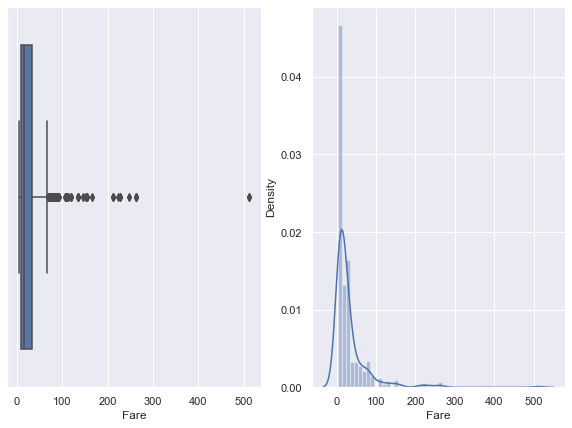

In [41]:
#Visualising outlier and skewness using boxplot and distribution plot
fig, ax = plt.subplots(1,2, figsize = (10,7))
sns.boxplot(tt['Fare'], ax = ax[0])
sns.distplot(tt['Fare'], ax = ax[1])

#we've rightly skewed data

In [42]:
#performing log transformation to remove skewness
tt['Fare'] = np.log(tt['Fare'])

In [43]:
#performing cuberoot transformation to remove skewness

tt['Fare'] = np.cbrt(tt['Fare'])

In [44]:
#Checking skewness after treating it
tt['Fare'].skew()

0.5543066804609175

<AxesSubplot:xlabel='Fare', ylabel='Density'>

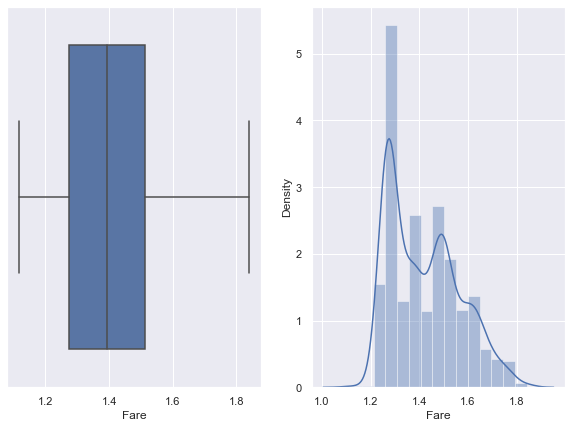

In [45]:
#Visualising data distribution after skewness removal
fig, ax = plt.subplots(1,2,figsize = (10,7))
sns.boxplot(tt['Fare'], ax = ax[0])
sns.distplot(tt['Fare'], ax = ax[1])

In [46]:
#Encoding categorical Data
tt_new = pd.get_dummies(tt)
tt_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n,Embarked_True,Embarked_S
0,0,3,0,22.0,1,0,1.255919,1,0,0,0,0,0,0,0,0,1,0,1
1,1,1,1,38.0,1,0,1.621920,1,0,0,1,0,0,0,0,0,0,0,1
2,1,3,1,26.0,0,0,1.274456,0,0,0,0,0,0,0,0,0,1,0,1
3,1,1,1,35.0,1,0,1.583712,1,0,0,1,0,0,0,0,0,0,0,1
4,0,3,0,35.0,0,0,1.277660,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,1.368862,0,0,0,0,0,0,0,0,0,1,0,1
887,1,1,1,19.0,0,0,1.503871,0,0,1,0,0,0,0,0,0,0,0,1
888,0,3,1,15.0,1,2,1.466652,3,0,0,0,0,0,0,0,0,1,0,1
889,1,1,0,26.0,0,0,1.503871,0,0,0,1,0,0,0,0,0,0,0,1


In [47]:
#Splitting Dataset into Target and Features

X = tt_new.drop('Survived', axis = 1)
y = tt_new['Survived']

## Model Building

In [48]:
#Splitting Data in training and testing datesets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

### Logistic Regression

In [49]:
#Finding Random state using LogisticRegression
maxAccu=0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on random_state",maxRS)

Best accuracy is 0.8619402985074627 on random_state 6


In [50]:
LR = LogisticRegression(random_state = 6)
LR.fit(X_train,y_train)
predlr = LR.predict(X_test)
acc = accuracy_score(y_test,predlr)
acc

0.5970149253731343

In [51]:
# Performing Evaluation metrics for our model
predlr=LR.predict(X_test)
print('Accuracy Score for Logistic Regression is :',round(accuracy_score(y_test,predlr),4)*100,'% \n')
print('Confusion Matrix of Logistic Regression : \n',confusion_matrix(y_test,predlr), '\n')
print('Classification Logistic Regression : \n',classification_report(y_test,predlr))

Accuracy Score for Logistic Regression is : 59.699999999999996 % 

Confusion Matrix of Logistic Regression : 
 [[156   8]
 [100   4]] 

Classification Logistic Regression : 
               precision    recall  f1-score   support

           0       0.61      0.95      0.74       164
           1       0.33      0.04      0.07       104

    accuracy                           0.60       268
   macro avg       0.47      0.49      0.41       268
weighted avg       0.50      0.60      0.48       268



array([[156,   8],
       [100,   4]], dtype=int64)

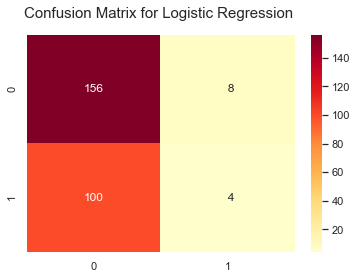

In [52]:
cm = confusion_matrix(y_test,predlr)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predlr),annot=True,fmt='3.0f',cmap="YlOrRd")
plt.title('Confusion Matrix for Logistic Regression ', y=1.05, size=15)
cm

### Decision Tree Classifier

In [53]:
#Instantiating Decision Tree model and training it
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
DT.score(X_test,y_test)

0.5

In [55]:
# Performing Evaluation metrics for our model
preddt=DT.predict(X_test)
print('Accuracy Score for Decision Treee is :',round(accuracy_score(y_test,preddt),4)*100,'% \n')
print('Confusion Matrix of Decision Tree: \n',confusion_matrix(y_test,preddt), '\n')
print('Classification Decision Tree: \n',classification_report(y_test,preddt))

Accuracy Score for Decision Treee is : 50.0 % 

Confusion Matrix of Decision Tree: 
 [[101  63]
 [ 71  33]] 

Classification Decision Tree: 
               precision    recall  f1-score   support

           0       0.59      0.62      0.60       164
           1       0.34      0.32      0.33       104

    accuracy                           0.50       268
   macro avg       0.47      0.47      0.47       268
weighted avg       0.49      0.50      0.50       268



array([[101,  63],
       [ 71,  33]], dtype=int64)

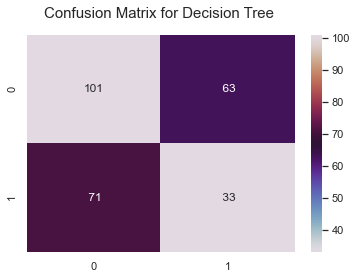

In [56]:
cm = confusion_matrix(y_test,preddt)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,preddt),annot=True,fmt='3.0f',cmap="twilight")
plt.title('Confusion Matrix for Decision Tree ', y=1.05, size=15)
cm

### K Nearest Neighors Classifier

In [57]:
#Instantiating KnN model and training it
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [58]:
acc_knn

72.87

In [59]:
# Performing Evaluation metrics for our model
knnpred=knn.predict(X_test)
print('Accuracy Score for KNN is :',round(accuracy_score(y_test,knnpred),4)*100,'% \n')
print('Confusion Matrix of KNN: \n',confusion_matrix(y_test,knnpred), '\n')
print('Classification KNN: \n',classification_report(y_test,knnpred))

Accuracy Score for KNN is : 57.46 % 

Confusion Matrix of KNN: 
 [[115  49]
 [ 65  39]] 

Classification KNN: 
               precision    recall  f1-score   support

           0       0.64      0.70      0.67       164
           1       0.44      0.38      0.41       104

    accuracy                           0.57       268
   macro avg       0.54      0.54      0.54       268
weighted avg       0.56      0.57      0.57       268



array([[115,  49],
       [ 65,  39]], dtype=int64)

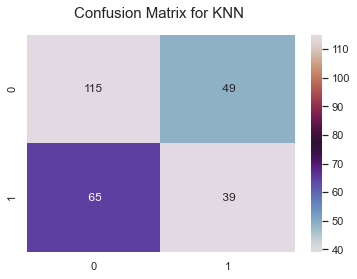

In [60]:
cm = confusion_matrix(y_test,knnpred)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,knnpred),annot=True,fmt='3.0f',cmap="twilight")
plt.title('Confusion Matrix for KNN ', y=1.05, size=15)
cm

### Random Forest Classifier

In [61]:
#Model instantiating and training it
RF = RandomForestClassifier()
RF.fit(X_train,y_train)


RandomForestClassifier()

In [62]:
RF.score(X_test,y_test)

0.4962686567164179

In [63]:
# Performing Evaluation metrics for our model
predrf=RF.predict(X_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,predrf),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,predrf), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,predrf))

Accuracy Score for Random Forest Classifier is : 49.63 % 

Confusion Matrix of Random Forest Classifier : 
 [[108  56]
 [ 79  25]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.58      0.66      0.62       164
           1       0.31      0.24      0.27       104

    accuracy                           0.50       268
   macro avg       0.44      0.45      0.44       268
weighted avg       0.47      0.50      0.48       268



array([[108,  56],
       [ 79,  25]], dtype=int64)

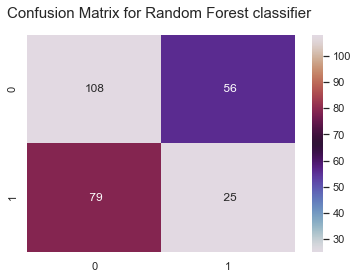

In [64]:
cm = confusion_matrix(y_test,predrf)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predrf),annot=True,fmt='3.0f',cmap="twilight")
plt.title('Confusion Matrix for Random Forest classifier ', y=1.05, size=15)
cm

### Support Vector Classifier

In [65]:
#Instantiating SVC model and training it

svc  = SVC()
svc.fit(X_train,y_train)

SVC()

In [66]:
svc.score(X_test,y_test)

0.6119402985074627

In [67]:
# Performing Evaluation metrics for our model
svcpred=svc.predict(X_test)
print('Accuracy Score for SVC is :',round(accuracy_score(y_test,svcpred),4)*100,'% \n')
print('Confusion Matrix of SVC: \n',confusion_matrix(y_test,svcpred), '\n')
print('Classification SVC: \n',classification_report(y_test,svcpred))

Accuracy Score for SVC is : 61.19 % 

Confusion Matrix of SVC: 
 [[164   0]
 [104   0]] 

Classification SVC: 
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       164
           1       0.00      0.00      0.00       104

    accuracy                           0.61       268
   macro avg       0.31      0.50      0.38       268
weighted avg       0.37      0.61      0.46       268



array([[164,   0],
       [104,   0]], dtype=int64)

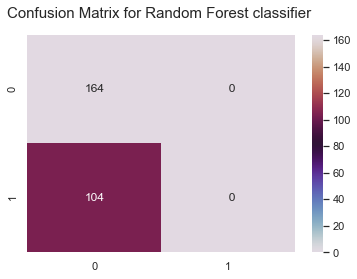

In [68]:
cm = confusion_matrix(y_test,svcpred)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,svcpred),annot=True,fmt='3.0f',cmap="twilight")
plt.title('Confusion Matrix for Random Forest classifier ', y=1.05, size=15)
cm

In [69]:
#Printing cross_val_scores of all models used so far

CVscore_LR = cross_val_score(LR,X,y, cv = 10)
print("Cross validation of Logistic Regression score is :", round(CVscore_LR.mean(),3)*100,'%')

CVscore_DT = cross_val_score(DT,X,y,cv = 10 )
print("Cross validation score of Decision Tree is :", round(CVscore_DT.mean(),4)*100,'%')

CVscore_Knn = cross_val_score(knn,X,y,cv = 10 )
print("Cross validation score of KNeighbors Classifier :", round(CVscore_Knn.mean(),4)*100,'%')

CVscore_RF = cross_val_score(RF,X,y,cv = 10 )
print("Cross validation score of Random Forest Classifier :", round(CVscore_RF.mean(),4)*100,'%')

CVscore_Svc = cross_val_score(svc,X,y,cv = 10 )
print("Cross validation score Support Vector Classifier is :",round(CVscore_Svc.mean(),4)*100,'%')


Cross validation of Logistic Regression score is : 79.7 %
Cross validation score of Decision Tree is : 77.12 %
Cross validation score of KNeighbors Classifier : 75.87 %
Cross validation score of Random Forest Classifier : 80.7 %
Cross validation score Support Vector Classifier is : 64.2 %


In [70]:
#Creating a Dataframe to check difference between model accuracy and cross_val_score
data = {'Model Accuracy' : [0.8582,0.5597,0.7689,0.5336,0.6045],
                      'Cross-Val-Score': [0.796,0.7667,0.706,0.810,0.6802]}
                      
Model = pd.DataFrame(data,index = ['Logistic Regression','Decision Tree','KNN','Random Forest Classifier','SVC'])
Model['ModelAcc - CVScore'] = Model['Model Accuracy'] - Model['Cross-Val-Score']
Model

,Model Accuracy,Cross-Val-Score,ModelAcc - CVScore
Logistic Regression,0.8582,0.7960,0.0622
Decision Tree,0.5597,0.7667,-0.2070
KNN,0.7689,0.7060,0.0629
Random Forest Classifier,0.5336,0.8100,-0.2764
SVC,0.6045,0.6802,-0.0757


## Hyerparameter tuning of Models

#### Tuning Decision Tree

In [71]:
grid = {"criterion" : ['gini','entropy'],
       "splitter" : ['best','random'],
       "max_depth" : [3,4,5,6,7,8,9,10,None],
       "max_features" : ["auto","log2","sqrt"],
       "min_samples_split" : [2,3,4,5,6],
       "min_samples_leaf": [4,6,8,10,12]}


In [72]:
gs = GridSearchCV(estimator = DT, param_grid = grid, cv = 5, verbose = 3 )


In [73]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.600 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.608 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.581 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.613 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.632 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [4, 6, 8, 10, 12],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']},
             verbose=3)

In [74]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 4,
 'splitter': 'random'}

In [75]:
DecisionTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 9, max_features = 'sqrt', min_samples_leaf = 4, min_samples_split = 4, splitter = 'best')

In [76]:
DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=4)

In [77]:
# Performing Evaluation metrics for our model
DTpred=DecisionTree.predict(X_test)
print('Accuracy Score for Decision Tree  is :',round(accuracy_score(y_test,DTpred),4)*100,'% \n')
print('Confusion Matrix of Decision Tree : \n',confusion_matrix(y_test,DTpred), '\n')
print('Classification Decision Tree : \n',classification_report(y_test,DTpred))

Accuracy Score for Decision Tree  is : 51.870000000000005 % 

Confusion Matrix of Decision Tree : 
 [[106  58]
 [ 71  33]] 

Classification Decision Tree : 
               precision    recall  f1-score   support

           0       0.60      0.65      0.62       164
           1       0.36      0.32      0.34       104

    accuracy                           0.52       268
   macro avg       0.48      0.48      0.48       268
weighted avg       0.51      0.52      0.51       268



Confusion matrix, without normalization
[[106  58]
 [ 71  33]]
Normalized confusion matrix
[[0.64634146 0.35365854]
 [0.68269231 0.31730769]]


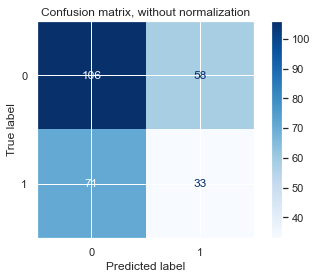

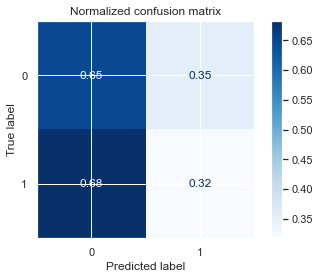

In [78]:
# Plotting both non-normalized and normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(DecisionTree, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Tuning Logistic Regression

In [79]:
grid = {"penalty":[ 'l2', 'elasticnet', None],
        "random_state" : [86],
        "warm_start" : ['True', 'False'],
        "n_jobs" : [1, -1]
       }

In [80]:
gridsearch = GridSearchCV(LR,grid, cv = 5)

In [81]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=6),
             param_grid={'n_jobs': [1, -1],
                         'penalty': ['l2', 'elasticnet', None],
                         'random_state': [86],
                         'warm_start': ['True', 'False']})

In [82]:
gridsearch.best_params_


{'n_jobs': 1, 'penalty': 'l2', 'random_state': 86, 'warm_start': 'True'}

In [83]:
model = LogisticRegression(n_jobs = 1, random_state = 86, warm_start = True, penalty = 'l2')

In [84]:
model.fit(X_train,y_train)

LogisticRegression(n_jobs=1, random_state=86, warm_start=True)

In [85]:
# Performing Evaluation metrics for our model
predmodel=model.predict(X_test)
print('Accuracy Score for Logistic Regression is :',round(accuracy_score(y_test,predmodel),4)*100,'% \n')
print('Confusion Matrix of Logistic Regression : \n',confusion_matrix(y_test,predmodel), '\n')
print('Classification Random Logistic Regression : \n',classification_report(y_test,predmodel))

Accuracy Score for Logistic Regression is : 59.699999999999996 % 

Confusion Matrix of Logistic Regression : 
 [[156   8]
 [100   4]] 

Classification Random Logistic Regression : 
               precision    recall  f1-score   support

           0       0.61      0.95      0.74       164
           1       0.33      0.04      0.07       104

    accuracy                           0.60       268
   macro avg       0.47      0.49      0.41       268
weighted avg       0.50      0.60      0.48       268



Confusion matrix, without normalization
[[156   8]
 [100   4]]
Normalized confusion matrix
[[0.95121951 0.04878049]
 [0.96153846 0.03846154]]


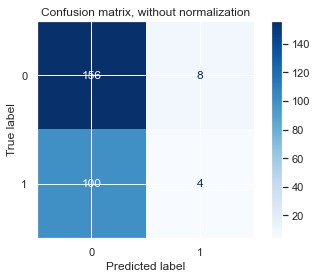

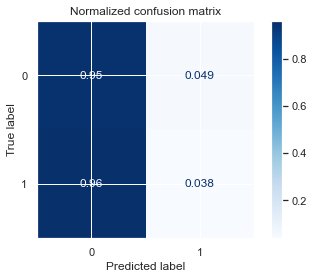

In [86]:
# Plotting both non-normalized and normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Tuning KNN

In [87]:
grid = {'n_neighbors' : [3,5,7,9,11,13],
       'weights': ['uniform','distance'],
       'algorithm' : ['auto','ball_tree','kd_tree','brute'],
       'n_jobs': [1,-1],
       'leaf_size' : [30,35,40]}

In [88]:
gridsearch = GridSearchCV(knn,grid, cv = 5)

In [89]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 35, 40], 'n_jobs': [1, -1],
                         'n_neighbors': [3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']})

In [90]:
gridsearch.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'n_jobs': 1,
 'n_neighbors': 7,
 'weights': 'uniform'}

In [91]:
knn = KNeighborsClassifier(algorithm = 'ball_tree',leaf_size = 30,n_jobs=1,n_neighbors = 11, weights ='uniform')

In [92]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=1, n_neighbors=11)

In [93]:
knn.score(X_test,y_test)

0.5522388059701493

In [94]:
# Performing Evaluation metrics for our model
knn1 =knn.predict(X_test)
print('Accuracy Score for SVC is :',round(accuracy_score(y_test,knn1),4)*100,'% \n')
print('Confusion Matrix of SVC: \n',confusion_matrix(y_test,knn1), '\n')
print('Classification SVC: \n',classification_report(y_test,knn1))

Accuracy Score for SVC is : 55.22 % 

Confusion Matrix of SVC: 
 [[123  41]
 [ 79  25]] 

Classification SVC: 
               precision    recall  f1-score   support

           0       0.61      0.75      0.67       164
           1       0.38      0.24      0.29       104

    accuracy                           0.55       268
   macro avg       0.49      0.50      0.48       268
weighted avg       0.52      0.55      0.53       268



Confusion matrix, without normalization
[[123  41]
 [ 79  25]]
Normalized confusion matrix
[[0.75       0.25      ]
 [0.75961538 0.24038462]]


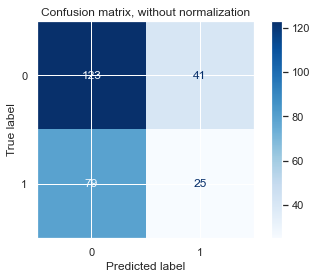

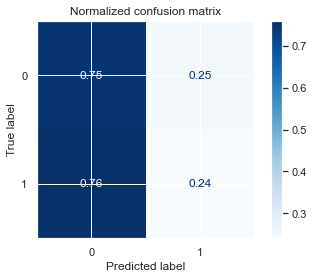

In [95]:
# Plotting both non-normalized and normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Tuning SVC

In [96]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.621 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.621 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.621 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.621 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.616 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [97]:
print(grid.best_estimator_)


SVC(C=1000, gamma=0.01)


In [98]:
svc1 = SVC(C = 1, gamma = 0.0001, kernel = 'rbf')

In [99]:
svc1.fit(X_train,y_train)

SVC(C=1, gamma=0.0001)

In [100]:
svc1.score(X_test,y_test)

0.6119402985074627

In [101]:
# Performing Evaluation metrics for our model
pred1 =model.predict(X_test)
print('Accuracy Score for SVC is :',round(accuracy_score(y_test,pred1),4)*100,'% \n')
print('Confusion Matrix of SVC: \n',confusion_matrix(y_test,pred1), '\n')
print('Classification SVC: \n',classification_report(y_test,pred1))

Accuracy Score for SVC is : 59.699999999999996 % 

Confusion Matrix of SVC: 
 [[156   8]
 [100   4]] 

Classification SVC: 
               precision    recall  f1-score   support

           0       0.61      0.95      0.74       164
           1       0.33      0.04      0.07       104

    accuracy                           0.60       268
   macro avg       0.47      0.49      0.41       268
weighted avg       0.50      0.60      0.48       268



Confusion matrix, without normalization
[[156   8]
 [100   4]]
Normalized confusion matrix
[[0.95121951 0.04878049]
 [0.96153846 0.03846154]]


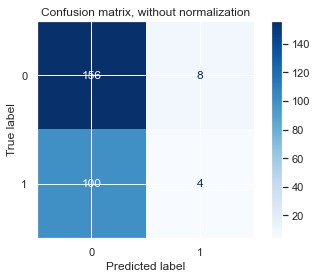

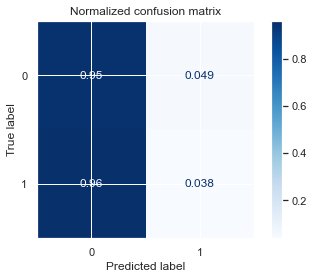

In [102]:
# Plotting both non-normalized and normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

__Conclusion__ : SVC is the best model after hyperparameter tuning giving us Recall of 96%

### Saving Model

In [103]:
joblib.dump(svc1,"TitanicSurvivalAnalysis.pkl")

['TitanicSurvivalAnalysis.pkl']

### Loading Model

In [104]:
model = joblib.load("TitanicSurvivalAnalysis.pkl")

In [105]:
#predicting test data using loaded model and saving the results in a dataframe
prediction = model.predict(X_test)
prediction =   list(prediction)

In [106]:
Results = pd.DataFrame({})
Results['Actual Survival'] = y[:268]
Results['Predicted Survival'] = prediction
Results

,Actual Survival,Predicted Survival
0,0,0
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
263,0,0
264,0,0
265,0,0
266,0,0


In [107]:
#Converting the saved file into .csv format
Results.to_csv('Results.csv',index = False)